In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = 10,8

import warnings
warnings.filterwarnings('ignore')

In [240]:
df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [241]:
df.shape

(215, 15)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [243]:
df.drop('sl_no',axis=1,inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [244]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [245]:
missing_percentage = (df['salary'].isnull().sum()/len(df))*100
print(round(missing_percentage,2),'%')

31.16 %


In [246]:
df.fillna(0,inplace=True)

In [247]:
df['salary'].isnull().sum()

0

In [248]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

Hence, It is a Balanced Data-set.

In [249]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [250]:
df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [251]:
df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [252]:
mean_ssc_p = df.groupby('gender')['ssc_p'].mean()
mean_ssc_p

gender
F    68.310921
M    66.752518
Name: ssc_p, dtype: float64

In [253]:
mean_hsc_p = df.groupby('gender')['hsc_p'].mean()
mean_hsc_p

gender
F    66.646842
M    66.161655
Name: hsc_p, dtype: float64

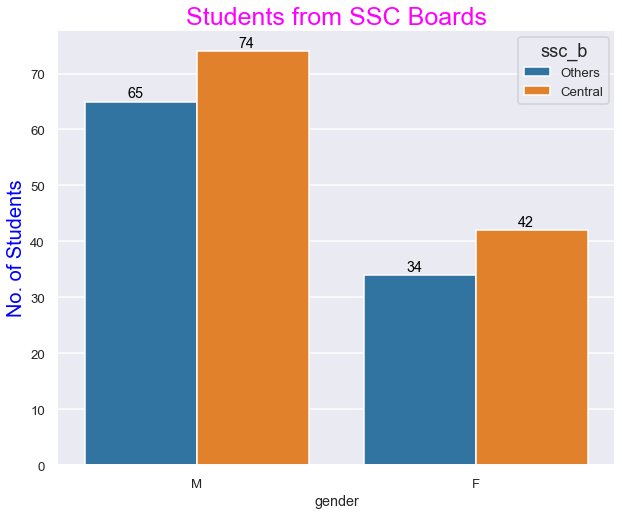

In [254]:
sns.set_style('darkgrid')
sns.set_context("talk",font_scale=0.8)
ax = sns.countplot(x='gender',hue='ssc_b',data=df)
ax.set_title("Students from SSC Boards",color='magenta',size=25)
ax.set_ylabel("Gender",color='b',size=20)
ax.set_ylabel("No. of Students",color='b',size=20)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.15, p.get_height()+0.15), va='bottom',
                    color= 'black')

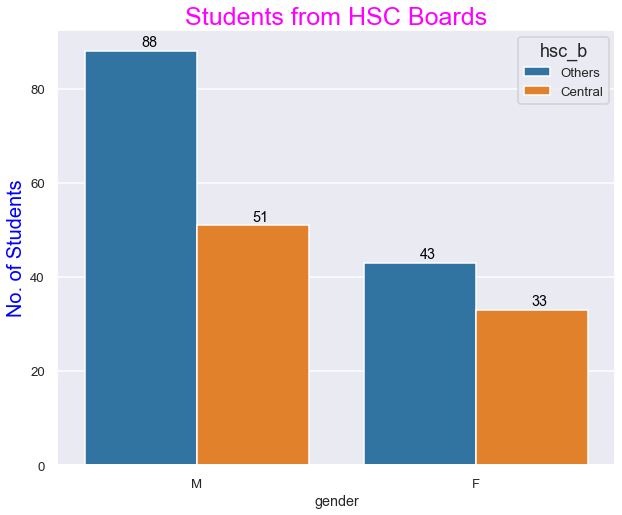

In [255]:
sns.set_style('darkgrid')
sns.set_context("talk",font_scale=0.8)
ax = sns.countplot(x='gender',hue='hsc_b',data=df)
ax.set_title("Students from HSC Boards",color = 'magenta',size=25)
ax.set_ylabel("Gender",color='b',size=20)
ax.set_ylabel("No. of Students",color='b',size=20)


for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.20, p.get_height()+0.30), va='bottom',
                    color= 'black')

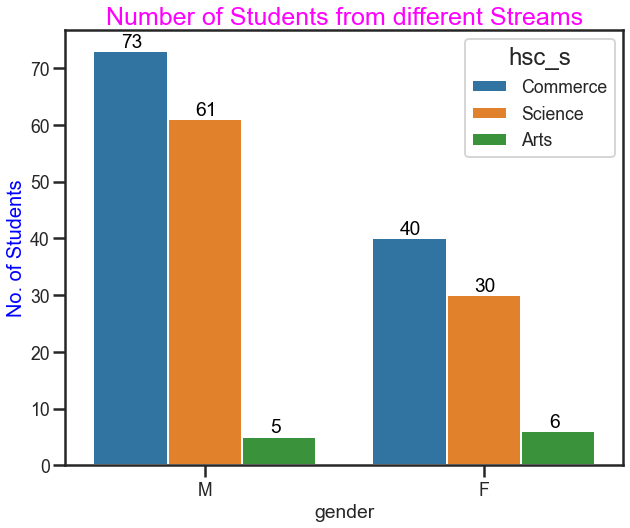

In [256]:
sns.set_style('ticks')
sns.set_context("poster",font_scale=0.8)
ax = sns.countplot(x='gender',hue='hsc_s',data=df)
ax.set_title("Number of Students from different Streams",color = 'magenta',size=25)
ax.set_ylabel("Gender",color='b',size=20)
ax.set_ylabel("No. of Students",color='b',size=20)


for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.10, p.get_height()+0.05), va='bottom',
                    color= 'black')

In [257]:
mean_degree_p = df.groupby('gender')['degree_p'].mean()
mean_degree_p

gender
F    68.090000
M    65.429856
Name: degree_p, dtype: float64

In [258]:
df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

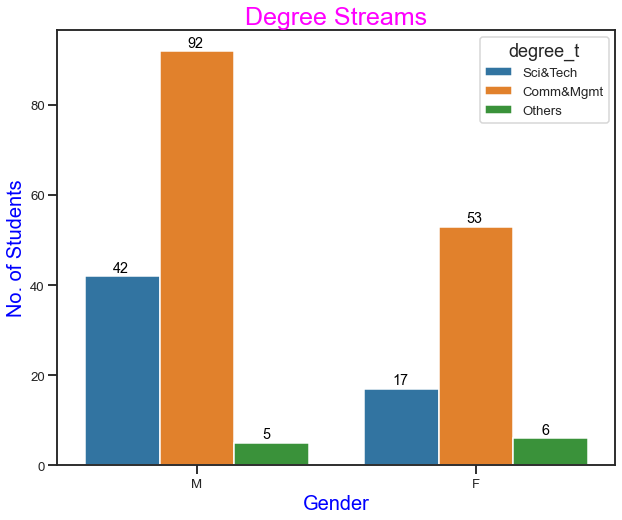

In [259]:
sns.set_context("talk",font_scale=0.8)
ax = sns.countplot(x='gender',hue='degree_t',data=df)
ax.set_title("Degree Streams",color = 'magenta',size=25)
ax.set_xlabel("Gender",size=20,color = 'b')
ax.set_ylabel("No. of Students",color='b',size=20)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.10, p.get_height()+0.30), va='bottom',
                    color= 'black')

In [260]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

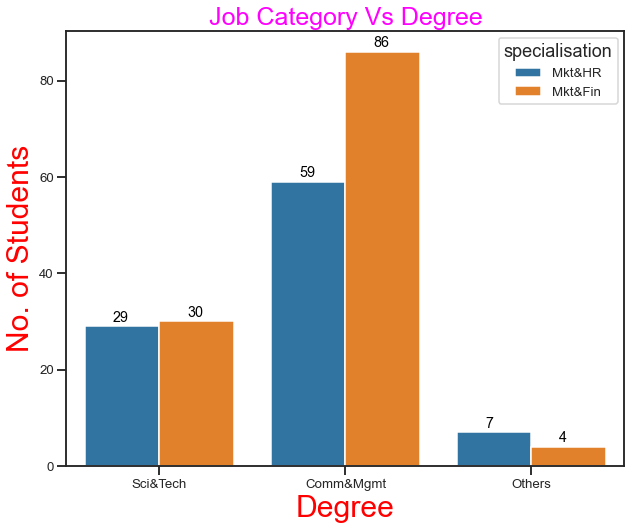

In [261]:
sns.set_context("talk",font_scale=0.8)
ax = sns.countplot(x='degree_t',hue='specialisation',data=df)
ax.set_title("Job Category Vs Degree",color = 'magenta',size=25)
ax.set_xlabel("Degree",size=30,color = 'red')
ax.set_ylabel("No. of Students",size=30,color = 'red')


for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.15, p.get_height()+0.30), va='bottom',
                    color= 'black')

Work Experience:-

Text(0, 0.5, 'Degree %')

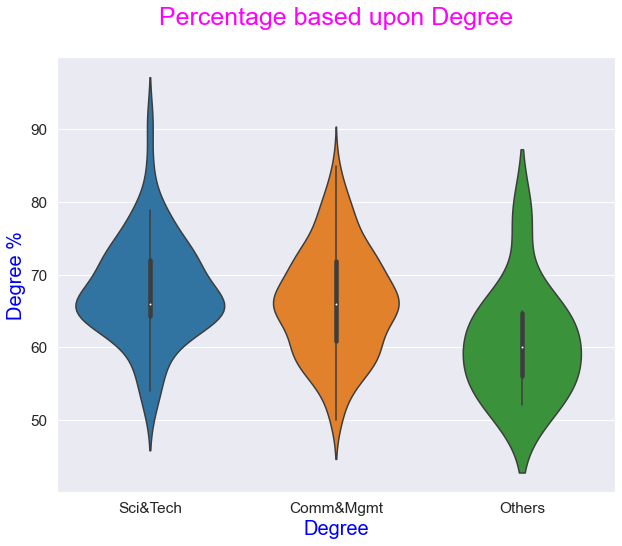

In [262]:
sns.set_style("darkgrid")
sns.set_context('notebook',font_scale=1.4)
ax = sns.violinplot(y='degree_p',x='degree_t',data=df)
ax.set_title("Percentage based upon Degree\n",color = 'magenta',size=25)
ax.set_xlabel("Degree",size=20,color = 'b')
ax.set_ylabel("Degree %",size=20,color = 'b')

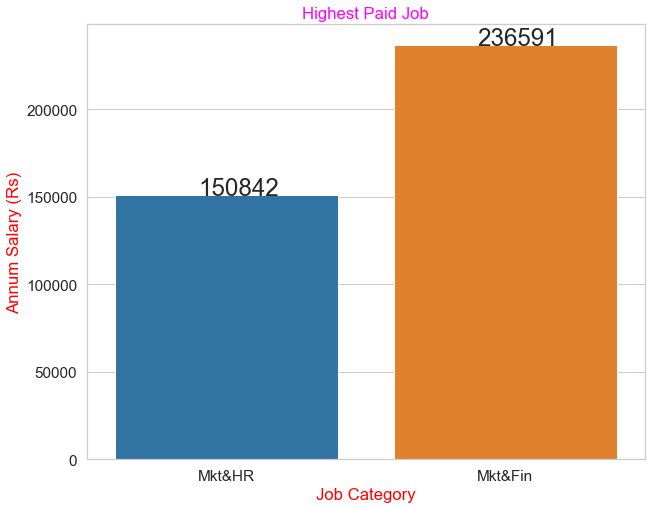

In [263]:
sns.set_style('whitegrid')
ax = sns.barplot(x='specialisation',y='salary',data=df,ci=None)
ax.set_xlabel("Job Category",color = 'red')
ax.set_ylabel("Annum Salary (Rs)",color='r')
ax.set_title("Highest Paid Job",color='magenta')

for p in ax.patches:
    ax.text(p.get_x()+0.30,p.get_height(),int(p.get_height()),size='x-large')

<AxesSubplot:>

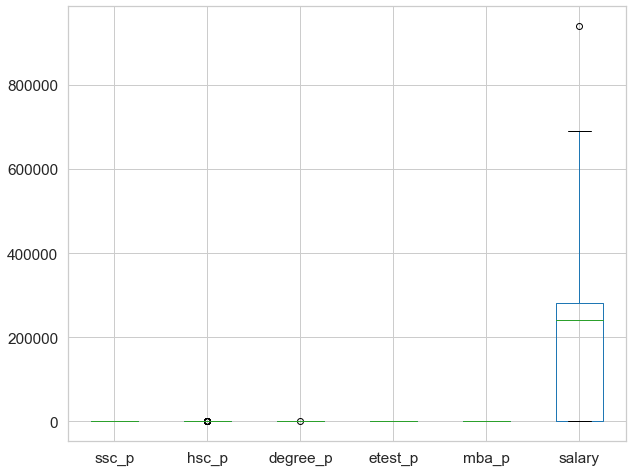

In [264]:
df.boxplot()

Dropping Unnecessary columns from the Data-set.

In [265]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [266]:
df.drop(['gender','ssc_b','hsc_b','hsc_s','mba_p'],axis=1,inplace=True)
df

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,status,salary
0,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,Placed,270000.0
1,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,Placed,200000.0
2,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,Placed,250000.0
3,56.00,52.00,52.00,Sci&Tech,No,66.0,Mkt&HR,Not Placed,0.0
4,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,Placed,425000.0
...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,Placed,400000.0
211,58.00,60.00,72.00,Sci&Tech,No,74.0,Mkt&Fin,Placed,275000.0
212,67.00,67.00,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,Placed,295000.0
213,74.00,66.00,58.00,Comm&Mgmt,No,70.0,Mkt&HR,Placed,204000.0


In [267]:
degree_n = {'Sci&Tech':0,'Comm&Mgmt':1,'Others':2}
workex_n = {'No':0,'Yes':1}
specialisation_n = {'Mkt&HR':0,'Mkt&Fin':1}
status_n = {'Not Placed':0,"Placed":1}

df['degree_t'] = df['degree_t'].map(degree_n)
df['workex'] = df['workex'].map(workex_n)
df['specialisation'] = df['specialisation'].map(specialisation_n)
df['status'] = df['status'].map(status_n)
df

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,status,salary
0,67.00,91.00,58.00,0,0,55.0,0,1,270000.0
1,79.33,78.33,77.48,0,1,86.5,1,1,200000.0
2,65.00,68.00,64.00,1,0,75.0,1,1,250000.0
3,56.00,52.00,52.00,0,0,66.0,0,0,0.0
4,85.80,73.60,73.30,1,0,96.8,1,1,425000.0
...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,1,0,91.0,1,1,400000.0
211,58.00,60.00,72.00,0,0,74.0,1,1,275000.0
212,67.00,67.00,73.00,1,1,59.0,1,1,295000.0
213,74.00,66.00,58.00,1,0,70.0,0,1,204000.0


In [268]:
X = df.drop('status',axis=1)
y = df['status']

In [269]:
[X]

[     ssc_p  hsc_p  degree_p  degree_t  workex  etest_p  specialisation  \
 0    67.00  91.00     58.00         0       0     55.0               0   
 1    79.33  78.33     77.48         0       1     86.5               1   
 2    65.00  68.00     64.00         1       0     75.0               1   
 3    56.00  52.00     52.00         0       0     66.0               0   
 4    85.80  73.60     73.30         1       0     96.8               1   
 ..     ...    ...       ...       ...     ...      ...             ...   
 210  80.60  82.00     77.60         1       0     91.0               1   
 211  58.00  60.00     72.00         0       0     74.0               1   
 212  67.00  67.00     73.00         1       1     59.0               1   
 213  74.00  66.00     58.00         1       0     70.0               0   
 214  62.00  58.00     53.00         1       0     89.0               0   
 
        salary  
 0    270000.0  
 1    200000.0  
 2    250000.0  
 3         0.0  
 4    425000.

In [270]:
[y]

[0      1
 1      1
 2      1
 3      0
 4      1
       ..
 210    1
 211    1
 212    1
 213    1
 214    0
 Name: status, Length: 215, dtype: int64]

In [271]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [272]:
X_train.shape , X_test.shape

((172, 8), (43, 8))

# Standarizing Data:-

In [273]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<AxesSubplot:>

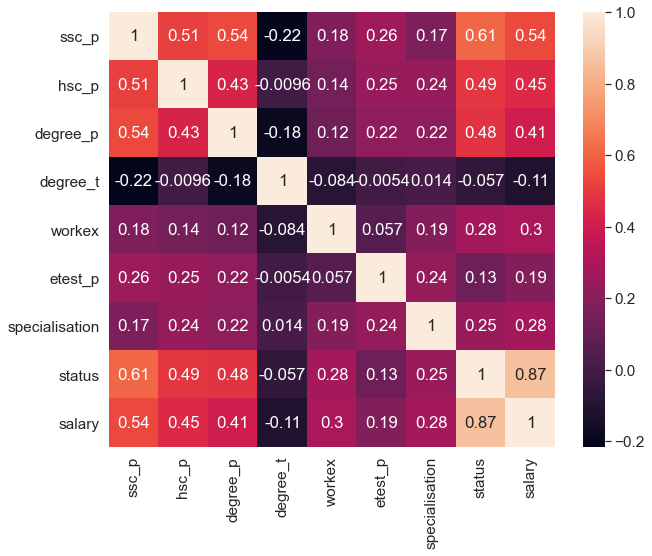

In [274]:
sns.heatmap(df.corr(),annot=True)

# Model Building:- 

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [276]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("\nLogisticRegression: ",lr.score(X_test,y_test)/0.01,'%')
print(30*'-')

y1_pred = lr.predict(X_test)

print("\nConfusion Metrics: ",confusion_matrix(y_test,y1_pred))
print("\n\nClassification Report: ",classification_report(y_test,y1_pred))
print("\n\nF1-Score: ",f1_score(y_test,y1_pred))


LogisticRegression:  100.0 %
------------------------------

Confusion Metrics:  [[18  0]
 [ 0 25]]


Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        25

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



F1-Score:  1.0


In [277]:
dt = DecisionTreeClassifier(min_samples_split=0.8,max_features=1,random_state=0)
dt.fit(X_train,y_train)
print("\nDecisionTreeClassifier: ",dt.score(X_test,y_test)/0.01,'%')
print(30*'-')

y2_pred = dt.predict(X_test)

print("\nConfusion Metrics: ",confusion_matrix(y_test,y2_pred))
print("\n\nClassification Report: ",classification_report(y_test,y2_pred))
print("\n\nF1-Score: ",f1_score(y_test,y2_pred))


DecisionTreeClassifier:  72.09302325581395 %
------------------------------

Confusion Metrics:  [[ 6 12]
 [ 0 25]]


Classification Report:                precision    recall  f1-score   support

           0       1.00      0.33      0.50        18
           1       0.68      1.00      0.81        25

    accuracy                           0.72        43
   macro avg       0.84      0.67      0.65        43
weighted avg       0.81      0.72      0.68        43



F1-Score:  0.8064516129032258


In [278]:
rf = RandomForestClassifier(n_estimators=200,criterion='gini',
 max_depth= 4 ,
 max_features= 'auto',random_state=42)
rf.fit(X_train,y_train)
print("\nRandomForestClassifier: ",rf.score(X_test,y_test)/0.01,'%')
print(30*'-')

y3_pred = rf.predict(X_test)

print("\nConfusion Metrics: ",confusion_matrix(y_test,y3_pred))
print("\n\nClassification Report: ",classification_report(y_test,y3_pred))
print("\n\nF1-Score: ",f1_score(y_test,y3_pred))


RandomForestClassifier:  100.0 %
------------------------------

Confusion Metrics:  [[18  0]
 [ 0 25]]


Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        25

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



F1-Score:  1.0


In [279]:
svc = SVC()
svc.fit(X_train,y_train)
print("\nSVC: ",svc.score(X_test,y_test)/0.01,'%')
print(30*'-')

y4_pred = svc.predict(X_test)

print("\nConfusion Metrics: ",confusion_matrix(y_test,y4_pred))
print("\n\nClassification Report: ",classification_report(y_test,y4_pred))
print("\n\nF1-Score: ",f1_score(y_test,y4_pred))


SVC:  100.0 %
------------------------------

Confusion Metrics:  [[18  0]
 [ 0 25]]


Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        25

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



F1-Score:  1.0
